In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd
import random
import cv2
import requests
from PIL import Image


In [4]:
np.random.seed(0)

In [5]:
with open("german-traffic-signs/train.p","rb") as f:
    train_data = pickle.load(f)

with open("german-traffic-signs/valid.p","rb") as f:
    val_data = pickle.load(f)

with open("german-traffic-signs/test.p","rb") as f:
    test_data = pickle.load(f)


In [6]:
x_train,y_train = train_data['features'],train_data['labels']
x_val,y_val = val_data['features'],val_data['labels']
x_test,y_test = test_data['features'],test_data['labels']

In [7]:
assert(x_train.shape[0]==y_train.shape[0]), "The number of training images in not equal to the number of training labels"
assert(x_val.shape[0]==y_val.shape[0]), "The number of validating images in not equal to the number of validating labels"
assert(x_test.shape[0]==y_test.shape[0]), "The number of testing images in not equal to the number of testing labels"

In [8]:
df = pd.read_csv("german-traffic-signs/signnames.csv")

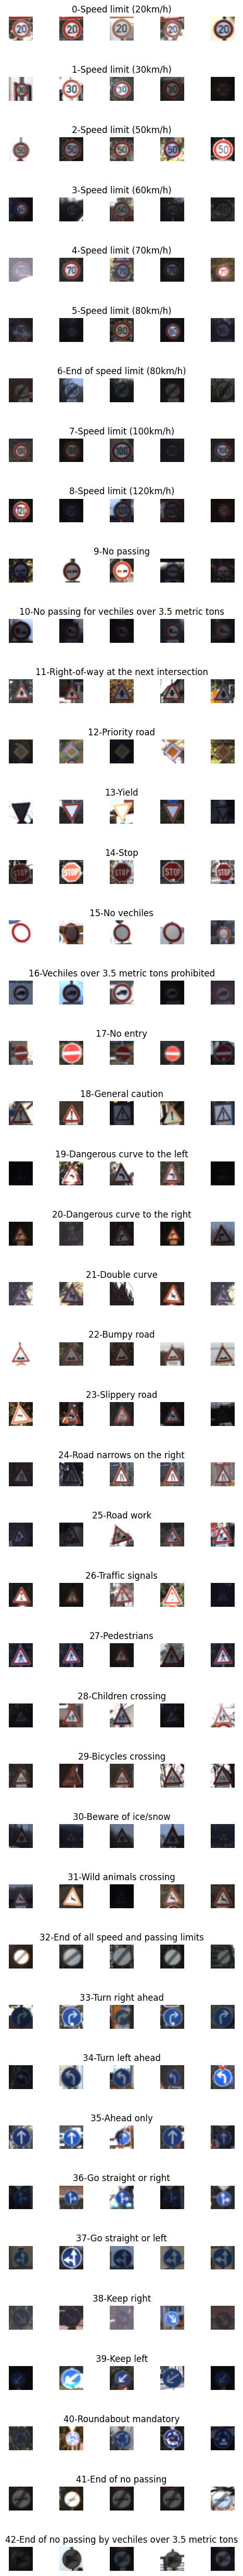

In [9]:
num_of_samples = []

cols= 5
num_of_classes = 43

fig,axs = plt.subplots(nrows=num_of_classes,ncols=cols,figsize = (5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in df.iterrows():
        x_selected = x_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :],cmap = plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


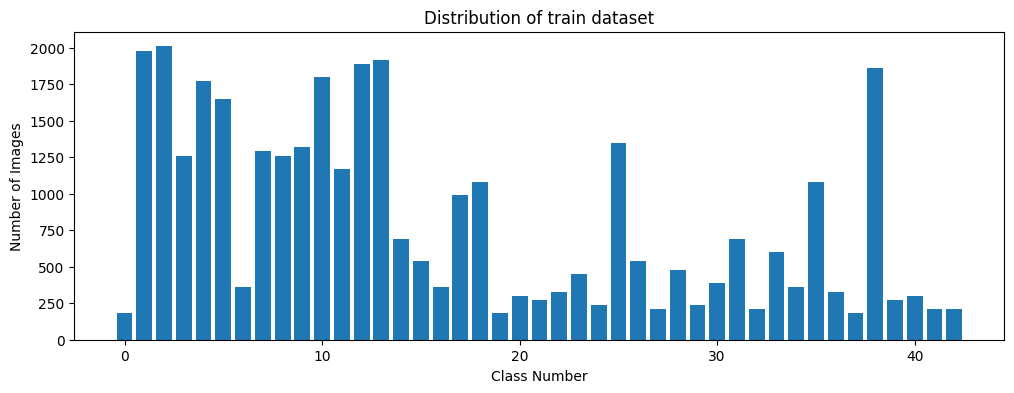

In [10]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_of_classes),num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

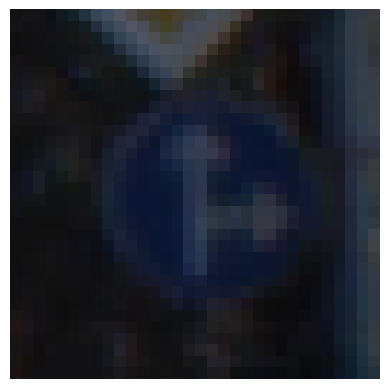

(32, 32, 3)
36


In [11]:
plt.imshow(x_train[1000])
plt.axis('off')
plt.show()
print(x_train[1000].shape)
print(y_train[1000])

In [12]:
def grayscale(img):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return gray

def equalize(img):
    equalimg = cv2.equalizeHist(img)
    return equalimg

(32, 32)


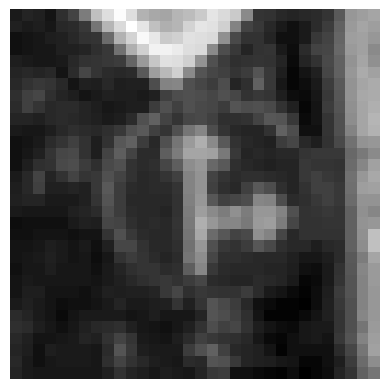

In [13]:
img = grayscale(x_train[1000])

plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

(32, 32)


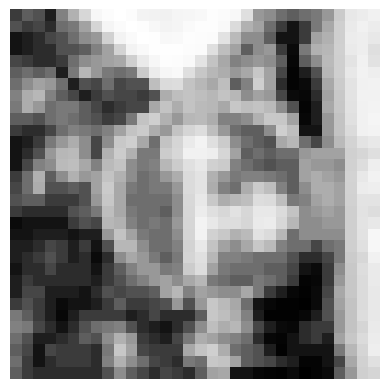

In [14]:
img = equalize(img)

plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

In [15]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [16]:
x_train = np.array(list(map(preprocessing,x_train)))
x_val = np.array(list(map(preprocessing,x_val)))
x_test = np.array(list(map(preprocessing,x_test)))

(-0.5, 31.5, 31.5, -0.5)

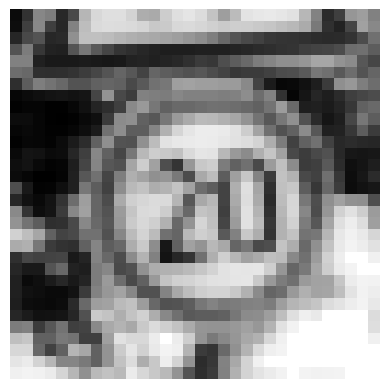

In [17]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)],cmap='gray')
plt.axis('off')

In [18]:
#train shape
num_of_train_images = x_train.shape[0]

#validation shape
num_of_val_images = x_val.shape[0]

#testing shape
num_of_test_images = x_test.shape[0]

#params
height = 32
width = 32
channels = 1

#reshape for CNN input
x_train = x_train.reshape(num_of_train_images,height,width,channels)
x_val = x_val.reshape(num_of_val_images,height,width,channels)
x_test = x_test.reshape(num_of_test_images,height,width,channels)

In [19]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(x_train)

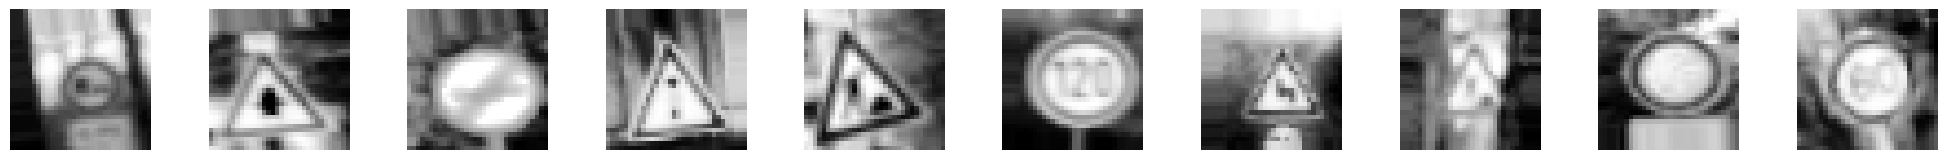

In [20]:
#Showing augmented images
batches = datagen.flow(x_train,y_train,batch_size=20)
x_batch,y_batch = next(batches)

fig,axs = plt.subplots(1,10,figsize= (20,5))
fig.tight_layout()

for i in range(10):
    axs[i].imshow(x_batch[i].reshape(32,32),cmap='gray')
    axs[i].axis('off')

In [21]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [22]:
def complex_Model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape = (height,width,channels),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))

    #compile
    model.compile(Adam(lr = 0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

    return model

In [23]:
model = complex_Model()

c:\Users\Gatik\.conda\envs\boston\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

In [27]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=50),steps_per_epoch = 200, epochs = 12 ,validation_data=(x_val,y_val),shuffle = 1)

Epoch 1/12


C:\Users\Gatik\AppData\Local\Temp\ipykernel_13300\2809032379.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=50),steps_per_epoch = 200, epochs = 12 ,validation_data=(x_val,y_val),shuffle = 1)


200/200 [==============================] - 55s 277ms/step - loss: 0.3316 - accuracy: 0.8971 - val_loss: 0.1158 - val_accuracy: 0.9628
Epoch 2/12
200/200 [==============================] - 57s 284ms/step - loss: 0.2978 - accuracy: 0.9083 - val_loss: 0.1065 - val_accuracy: 0.9673
Epoch 3/12
200/200 [==============================] - 55s 275ms/step - loss: 0.2864 - accuracy: 0.9114 - val_loss: 0.1085 - val_accuracy: 0.9660
Epoch 4/12
200/200 [==============================] - 56s 279ms/step - loss: 0.2660 - accuracy: 0.9188 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 5/12
200/200 [==============================] - 61s 303ms/step - loss: 0.2442 - accuracy: 0.9226 - val_loss: 0.0850 - val_accuracy: 0.9744
Epoch 6/12
200/200 [==============================] - 60s 300ms/step - loss: 0.2303 - accuracy: 0.9312 - val_loss: 0.0983 - val_accuracy: 0.9723
Epoch 7/12
200/200 [==============================] - 56s 283ms/step - loss: 0.2214 - accuracy: 0.9314 - val_loss: 0.0643 - val_accuracy: 0.9

Text(0, 0.5, 'Loss')

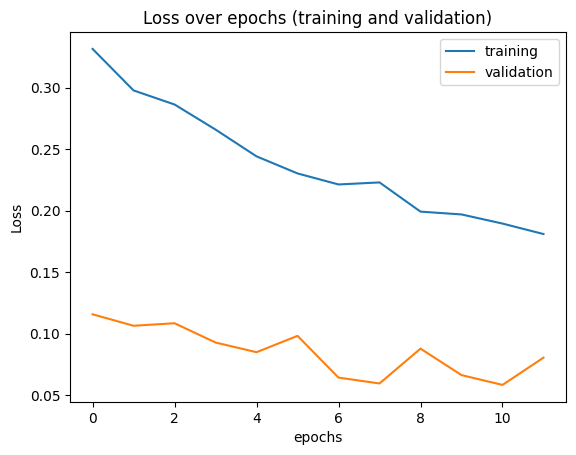

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss over epochs (training and validation)')
plt.xlabel("epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

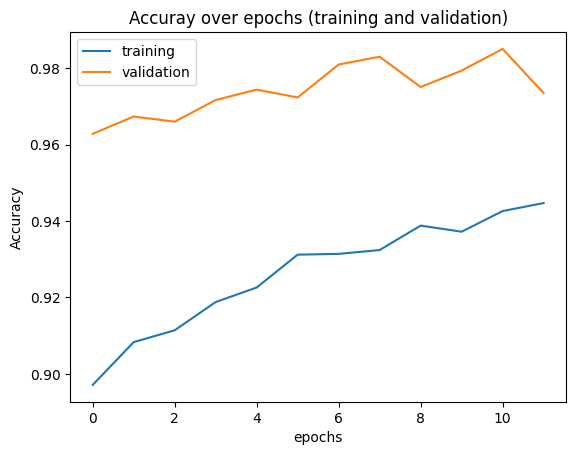

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuray over epochs (training and validation)')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [30]:
#Evaluate on test data
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test accuracy = ',score[1])

Test Score =  0.14527511596679688
Test accuracy =  0.9616785645484924


In [31]:
path = r"model.h5"
model.save(path)

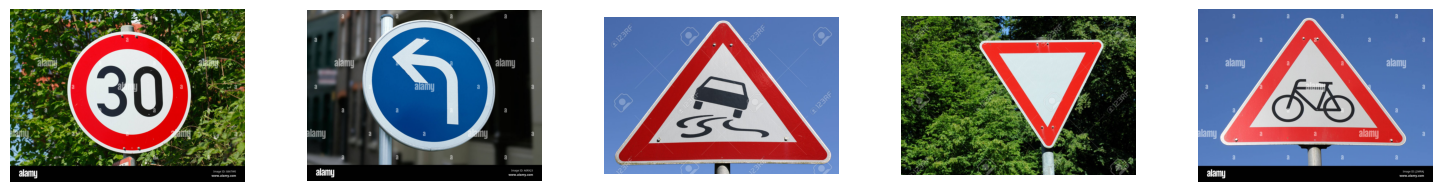

In [32]:
def getImg(url):
    r = requests.get(url, stream=True)
    img = Image.open(r.raw)
    return img

def showImg(img):
    plt.imshow(img, cmap=plt.get_cmap('gray'))

def prepareImg(img):
    img = np.asarray(img)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    return img

def predictImg(img):
    img = img.reshape(1, 32, 32, 1)
    #Test imagepred = model.predict(val_img)
    pred = model.predict(img)
    pred = np.argmax(pred)
    print("Predicted sign: "+ str(pred) )


urls = ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg",
        "https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg",
        "https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg",
        "https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg",
        "https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg"]



img1 = getImg(url=urls[0])
img2 = getImg(url=urls[1])
img3 = getImg(url=urls[2])
img4 = getImg(url=urls[3])
img5 = getImg(url=urls[4])

web_imgs = [img1,img2,img3,img4,img5]

fig,axs = plt.subplots(1,5,figsize= (15,10))
fig.tight_layout()

for i in range(5):
    axs[i].imshow(web_imgs[i],cmap='gray')
    axs[i].axis('off')

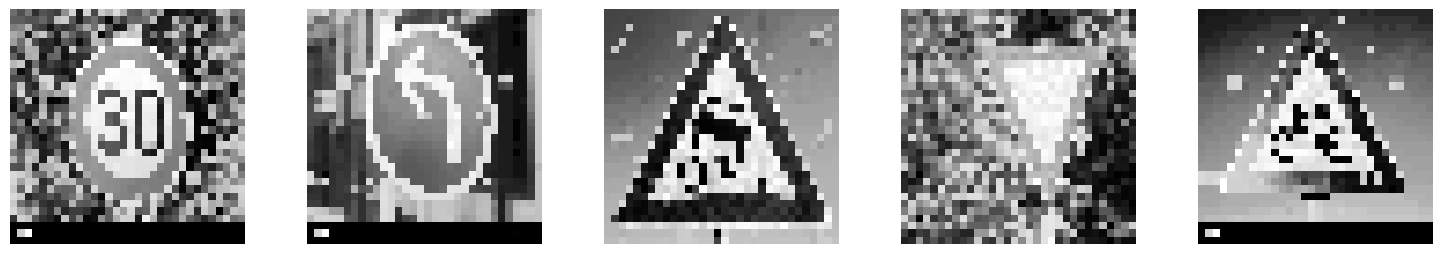

In [33]:
#Prepare image for feeding to trained CNN model

prep_img1 = prepareImg(img1)
prep_img2 = prepareImg(img2)
prep_img3 = prepareImg(img3)
prep_img4 = prepareImg(img4)
prep_img5 = prepareImg(img5)

prepared_imgs = [prep_img1,prep_img2,prep_img3,prep_img4,prep_img5]

fig,axs = plt.subplots(1,5,figsize= (15,10))
fig.tight_layout()

#Showing prepared images
for i in range(5):
    axs[i].imshow(prepared_imgs[i],cmap='gray')
    axs[i].axis('off')

In [34]:
#Prediction for each image
for i in range(5):
    predictImg(prepared_imgs[i])

1/1 [==============================] - 0s 163ms/step
Predicted sign: 1
1/1 [==============================] - 0s 29ms/step
Predicted sign: 34
1/1 [==============================] - 0s 26ms/step
Predicted sign: 23
1/1 [==============================] - 0s 28ms/step
Predicted sign: 13
1/1 [==============================] - 0s 24ms/step
Predicted sign: 25
